# i - Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya** berisi semua *library* yang digunakan dalam project.

In [343]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA

# Buat definisi model
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score

# Buat import hasil model saving
import joblib

# ii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [344]:
df_ori = pd.read_csv ("Influencers.csv")
df = df_ori.copy()
df

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,Male,1360,1358,597,978,278,98,5,0,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,Male,2273,2,6,2273,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,Male,197,540,261,170,27,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,Male,55,785,83,42,10,1,1,1,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,Female,216,679,191,160,52,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,Male,758,24,3,758,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,Female,27,0,0,27,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,Male,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,Male,0,0,0,0,0,0,0,0,0


In [345]:
# Menampilkan 10 data pertama
df.head(10)

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Albrecht Consadine,Albrecht,Consadine,aconsadinere,Male,1360,1358,597,978,278,98,5,0,1
1,Hayes Patriskson,Hayes,Patriskson,hpatrisksonkl,Male,2273,2,6,2273,0,0,0,0,0
2,Napoleon McVicar,Napoleon,McVicar,nmcvicar2v,Male,197,540,261,170,27,0,0,0,0
3,Simeon Kenan,Simeon,Kenan,skenan4f,Male,55,785,83,42,10,1,1,1,0
4,Laraine Frenzel;,Laraine,Frenzel;,lfrenzelmr,Female,216,679,191,160,52,2,2,0,0
5,Casar Jeves,Casar,Jeves,cjeves79,Male,5,0,0,5,0,0,0,0,0
6,Jaquelin Rubertis,Jaquelin,Rubertis,jrubertisia,Female,206,525,265,147,56,0,3,0,0
7,Veronika Moehle,Veronika,Moehle,vmoehlebt,Female,249,7,1,249,0,0,0,0,0
8,Bendix Yeeles,Bendix,Yeeles,byeelespy,Male,170,726,148,100,64,2,3,1,0
9,Ashlie Orto,Ashlie,Orto,aorto6f,Female,267,859,426,197,67,0,2,1,0


In [346]:
# Menampilkan 10 data terakhir
df.tail(10)

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2324,Adolphe Buchett,Adolphe,Buchett,abuchett1a,Male,4,0,0,3,1,0,0,0,0
2325,Elise Willarton,Elise,Willarton,ewillartoneq,Female,394,2195,403,269,122,1,2,0,0
2326,Douglas Jarlmann,Douglas,Jarlmann,djarlmannjv,Male,973,8,1,973,0,0,0,0,0
2327,Morrie Aldwich,Morrie,Aldwich,maldwich43,Male,1809,1384,549,1521,267,10,8,1,2
2328,Nanci McGroarty,Nanci,McGroarty,nmcgroarty4m,Female,362,745,199,190,168,3,1,0,0
2329,Olenolin Badcock,Olenolin,Badcock,obadcockom,Male,758,24,3,758,0,0,0,0,0
2330,Letty Sitlington,Letty,Sitlington,lsitlingtonbi,Female,27,0,0,27,0,0,0,0,0
2331,Lucas Billsberry,Lucas,Billsberry,lbillsberry55,Male,0,0,0,0,0,0,0,0,0
2332,Mathias Slobom,Mathias,Slobom,mslobom1b,Male,0,0,0,0,0,0,0,0,0
2333,Brook Chichgar,Brook,Chichgar,bchichgar5e,Male,2,0,0,2,0,0,0,0,0


## Melihat tipe data

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fullname       2334 non-null   object
 1   first_name     2334 non-null   object
 2   last_name      2334 non-null   object
 3   username       2334 non-null   object
 4   gender         2334 non-null   object
 5   num_reactions  2334 non-null   int64 
 6   num_comments   2334 non-null   int64 
 7   num_shares     2334 non-null   int64 
 8   num_likes      2334 non-null   int64 
 9   num_loves      2334 non-null   int64 
 10  num_wows       2334 non-null   int64 
 11  num_hahas      2334 non-null   int64 
 12  num_sads       2334 non-null   int64 
 13  num_angrys     2334 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 255.4+ KB


## Melihat data statistik pada data frame

In [348]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
num_reactions,2334.0,283.409597,446.605370,0.0,28.25,160.0,296.75,4094.0
num_comments,2334.0,642.478149,1442.202386,0.0,0.00,39.0,670.75,20990.0
num_shares,2334.0,115.679949,206.980639,0.0,0.00,12.0,169.00,3424.0
num_likes,2334.0,243.015424,413.178828,0.0,27.00,117.0,238.00,4094.0
num_loves,2334.0,35.540274,63.326895,0.0,0.00,3.0,49.00,657.0
num_wows,2334.0,2.448158,14.625152,0.0,0.00,0.0,1.00,278.0
num_hahas,2334.0,1.735219,6.046270,0.0,0.00,0.0,2.00,157.0
num_sads,2334.0,0.413882,1.477969,0.0,0.00,0.0,0.00,37.0
num_angrys,2334.0,0.254070,0.711890,0.0,0.00,0.0,0.00,8.0


Penjelasan tiap kolom:

| Column | Description |
| --- | --- |
| `fullname` | Nama lengkap influencer |
| `first_name` | Nama depan influencer |
| `last_name` | Nama belakang influencer |
| `username` | Username influencer |
| `gender` | Jenis kelamin influencer |
| `num_reactions` | Jumlah viewer yang memberikan reaksi saat seorang influencer live |
| `num_comments` | Jumlah viewer yang memberikan komentar saat seorang influencer live |
| `num_shares` | Jumlah viewer yang melakukan share live video influencer tersebut |
| `num_likes` | Jumlah viewer yang menyukai live video influencer tersebut |
| `num_loves` | Jumlah viewer yang memberikan reaksi `love` saat seorang influencer live |
| `num_wows` | Jumlah viewer yang memberikan reaksi `wow` saat seorang influencer live |
| `num_hahas` | Jumlah viewer yang memberikan reaksi `haha` saat seorang influencer live |
| `num_sads` | Jumlah viewer yang memberikan reaksi `sad` saat seorang influencer live |
| `num_angrys` | Jumlah viewer yang memberikan reaksi `angry` saat seorang influencer live |

# iii - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Likes dan Shares

C:\Users\farha\AppData\Local\Temp\ipykernel_33004\2765313990.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='num_likes', y='num_shares', hue='gender', palette=palette_color)


<function matplotlib.pyplot.show(close=None, block=None)>

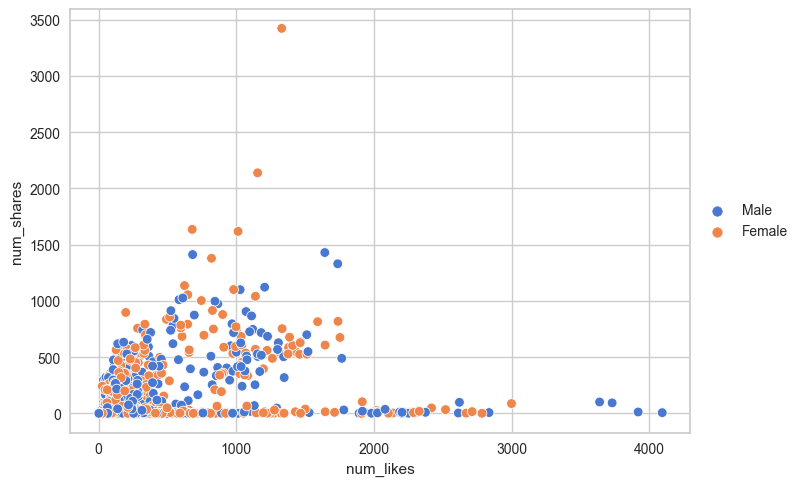

In [349]:
palette_color = sns.color_palette('muted')
sns.scatterplot(data=df, x='num_likes', y='num_shares', hue='gender', palette=palette_color)
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

## Reactions dan Comments

C:\Users\farha\AppData\Local\Temp\ipykernel_33004\1540704201.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='gender', palette=palette_color)


<function matplotlib.pyplot.show(close=None, block=None)>

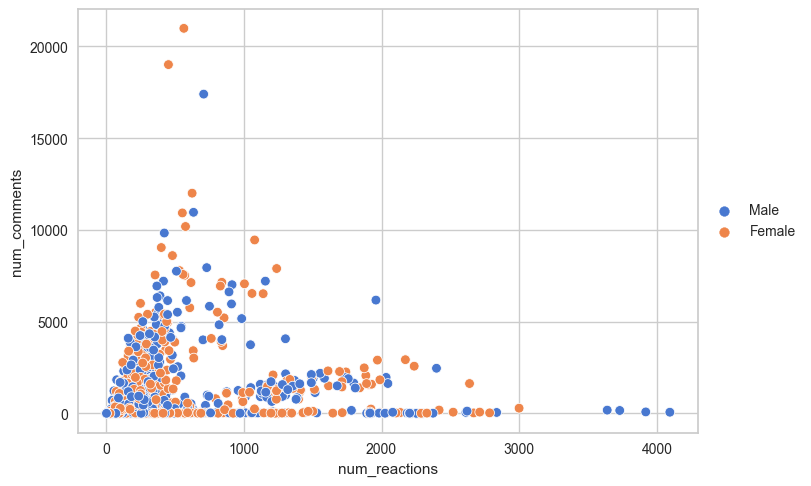

In [350]:
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='gender', palette=palette_color)
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

# iv - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Drop colomns

Menghilangkan kolom yang tidak berkorelasi

In [351]:
df.columns

Index(['fullname', 'first_name', 'last_name', 'username', 'gender',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [352]:
df.drop(['fullname', 'first_name', 'last_name', 'username', 'gender'], inplace=True, axis=1)

## Handle Missing Values

In [353]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(df)

,Total,Percent
num_reactions,0,0.0
num_comments,0,0.0
num_shares,0,0.0
num_likes,0,0.0
num_loves,0,0.0
num_wows,0,0.0
num_hahas,0,0.0
num_sads,0,0.0
num_angrys,0,0.0


Terlihat tidak adanya data yang hilang sehingga bisa dilakukan proses selanjutnya

## Handle Outlier

Melihat nilai skewness pada semua kolom

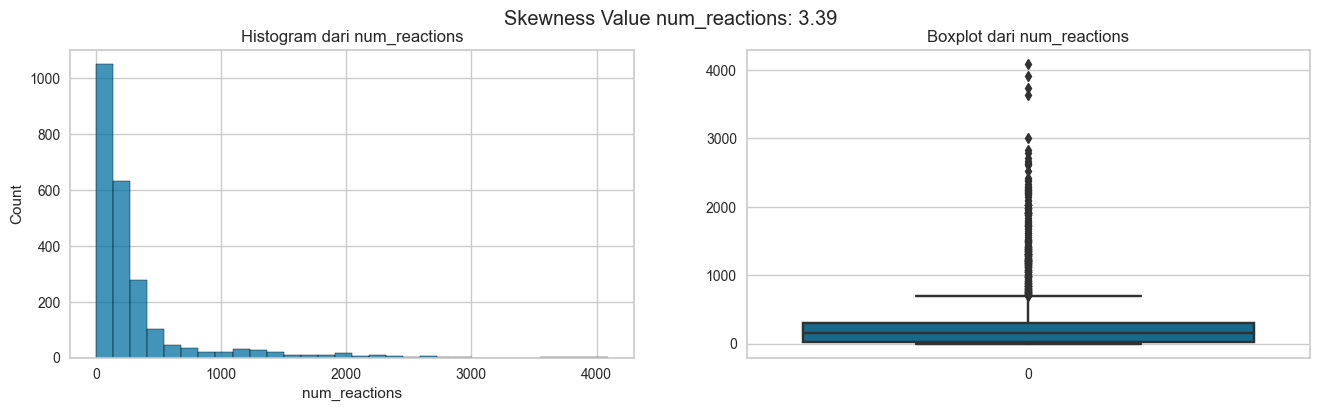

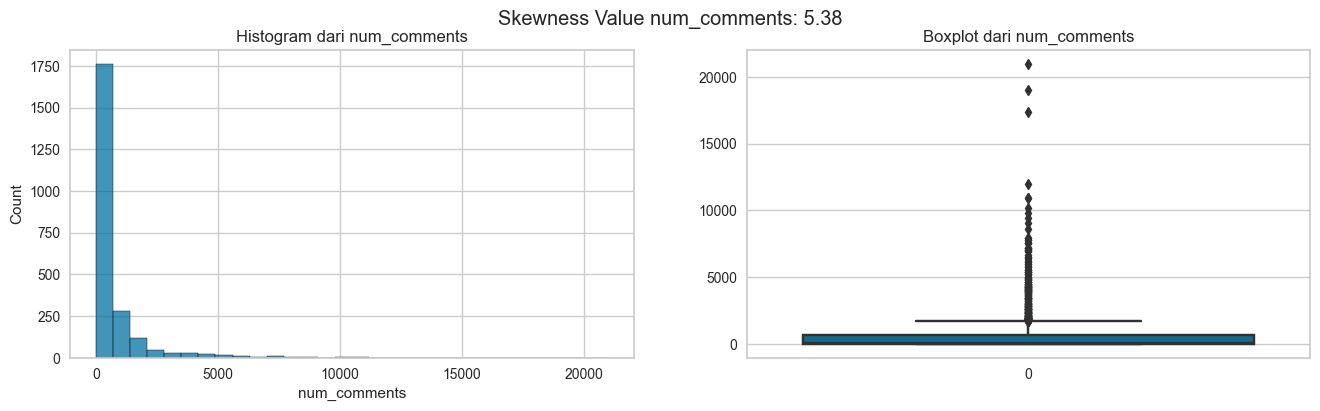

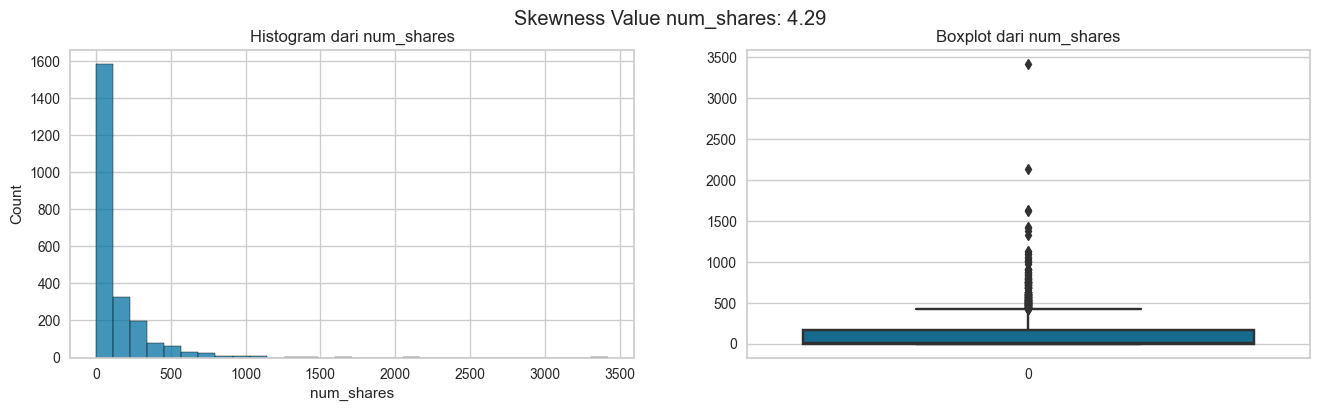

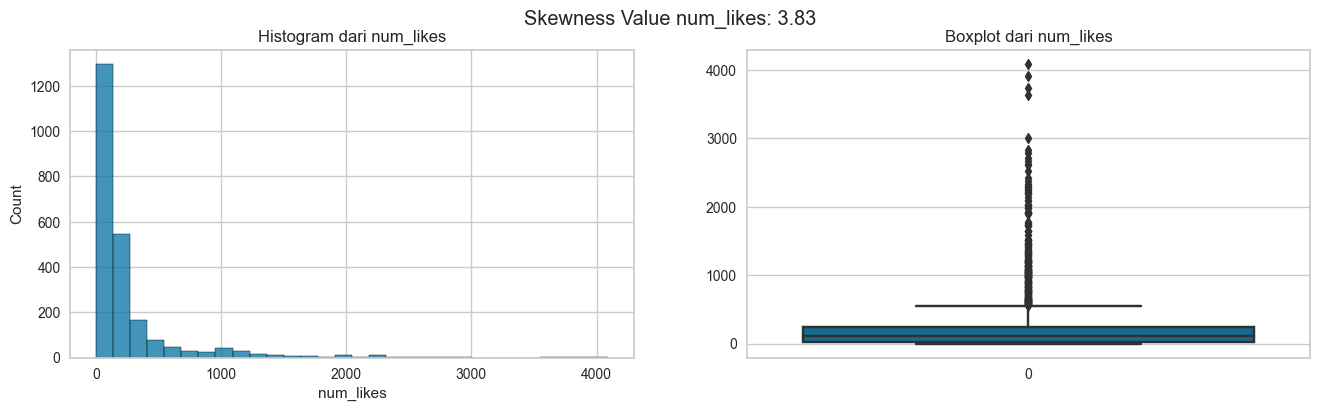

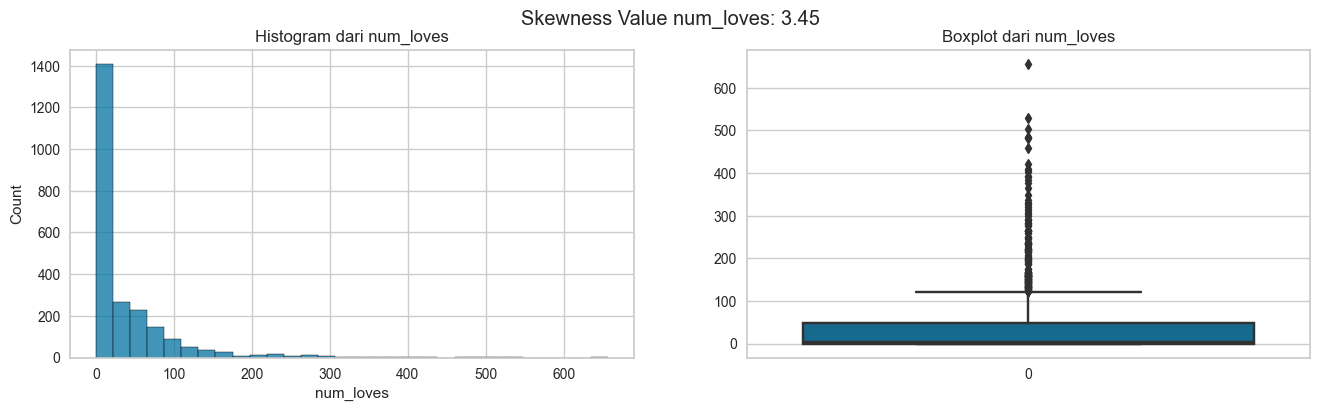

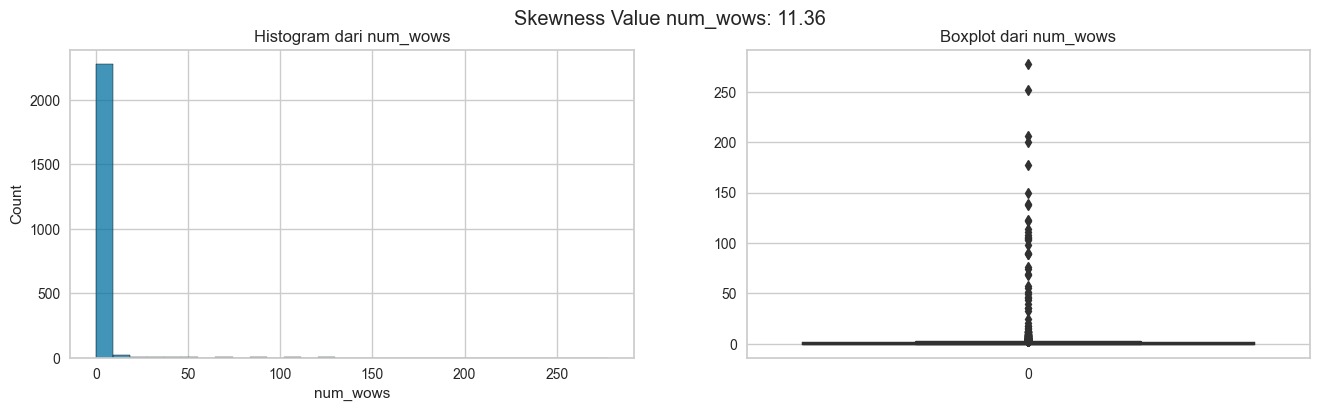

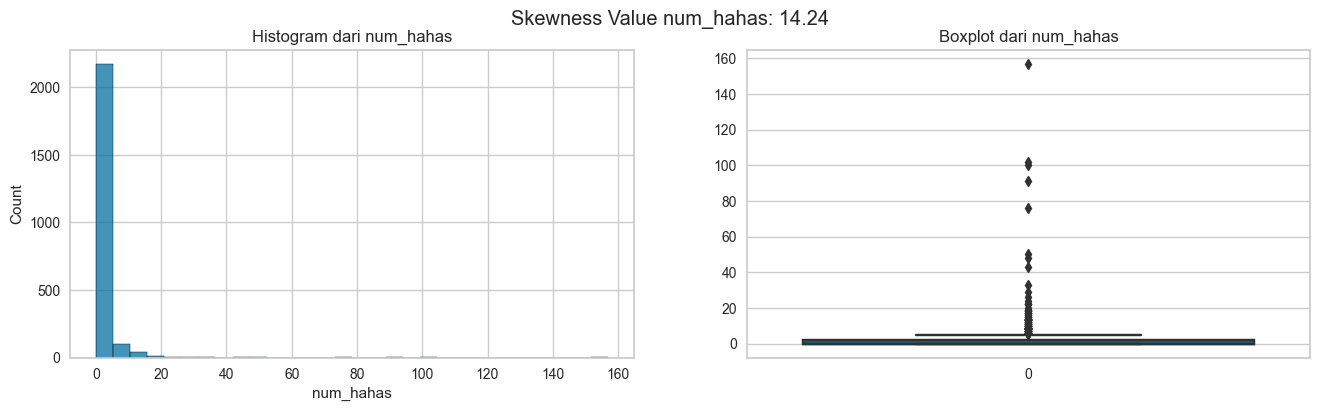

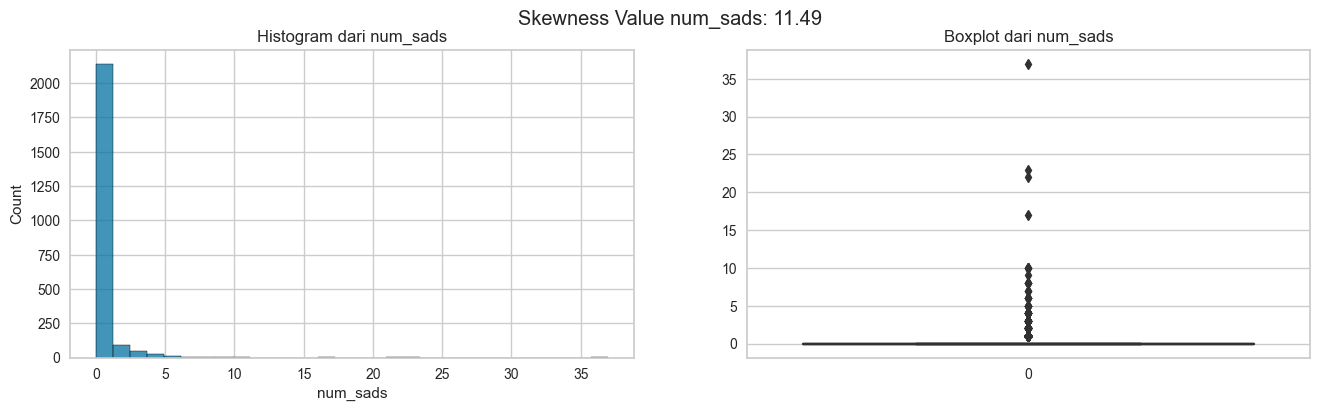

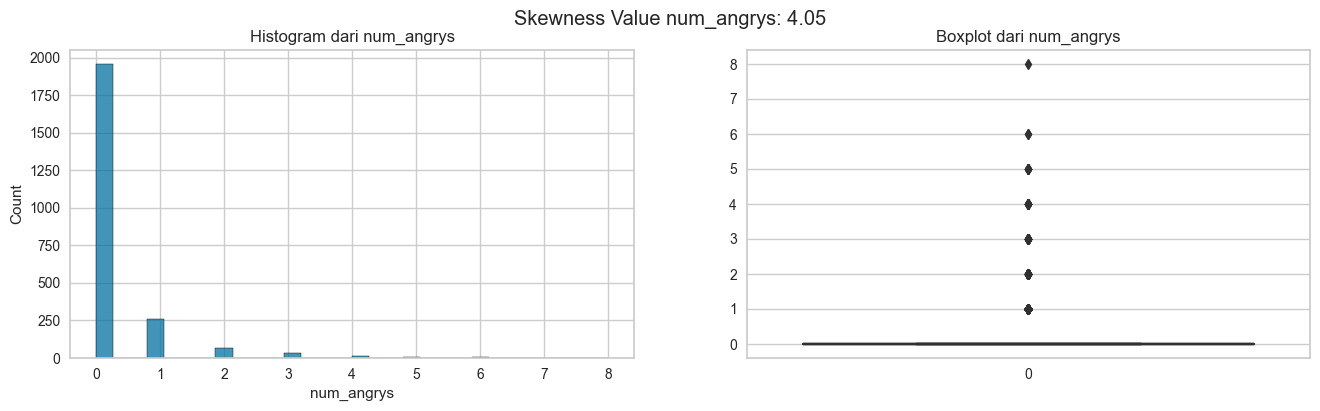

In [354]:
for i in df:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"Skewness Value {i}: {df[i].skew().round(decimals=2)}")
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[i].astype(float), bins=30)
    plt.title('Histogram dari {}'.format(i))

    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i].astype(float))
    plt.title('Boxplot dari {}'.format(i))

plt.show();

Melakukan Winsorizer pada data numerical

In [355]:
for i in df:
    winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=3)
    df[i] = winsorizer.fit_transform(df[[i]])

Melihat skewness setelah dilakukan Winsorizer

In [356]:
for i in df:
     print(f"Skewness Value {i}: {df[i].skew().round(decimals=2)}")

Skewness Value num_reactions: 2.38
Skewness Value num_comments: 2.67
Skewness Value num_shares: 1.95
Skewness Value num_likes: 2.46
Skewness Value num_loves: 2.05
Skewness Value num_wows: 6.78
Skewness Value num_hahas: 3.36
Skewness Value num_sads: 3.14
Skewness Value num_angrys: 2.57


## Scaling

In [357]:
scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)
df_scaled

array([[ 2.96748169,  0.72273686,  2.83953942, ...,  1.12503219,
        -0.39551667,  1.40052868],
       [ 3.68094129, -0.54071827, -0.60436182, ..., -0.48253493,
        -0.39551667, -0.40248975],
       [-0.18821066, -0.03943592,  0.88158541, ..., -0.48253493,
        -0.39551667, -0.40248975],
       ...,
       [-0.72275184, -0.54258177, -0.63932529, ..., -0.48253493,
        -0.39551667, -0.40248975],
       [-0.72275184, -0.54258177, -0.63932529, ..., -0.48253493,
        -0.39551667, -0.40248975],
       [-0.71732503, -0.54258177, -0.63932529, ..., -0.48253493,
        -0.39551667, -0.40248975]])

Pada numeric scaler, digunakan StandardScaler karena datanya terdistribusi secara normal.

## PCA

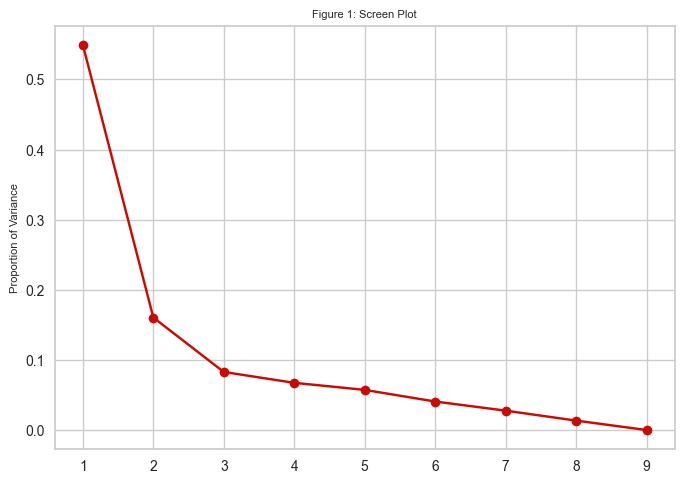

In [358]:
pca = PCA()
pca.fit(df_scaled)

PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers, 
         pca.explained_variance_ratio_, 
         'ro-')
plt.title('Figure 1: Screen Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()


Terlihat pada titik ke 3, nilai penurunan inersia tidak lagi signifikan pada titik selanjutnya, sehingga digunakan K = 3

In [359]:
pca = PCA(n_components=3)

df_scaled = pd.DataFrame(pca.fit_transform(df_scaled),columns=["PC1","PC2","PC3"])
df_scaled

,PC1,PC2,PC3
0,7.494120,2.919944,4.402168
1,1.124505,4.918952,-2.024510
2,-0.319900,-0.150494,0.114728
3,-0.530342,-0.835559,-0.506749
4,0.099887,-0.216309,0.358250
...,...,...,...
2329,-0.265004,2.274866,-0.893818
2330,-1.557045,-0.164576,0.179012
2331,-1.604243,-0.255100,0.218431
2332,-1.604243,-0.255100,0.218431


# v - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## KMeans

In [360]:
km = KMeans(n_clusters = 3, n_init = 'auto', random_state = 1509)

## Elbow Method

In [361]:
Elbow_M = KElbowVisualizer(km, k=10)

## Silhouette Method

In [362]:
Silhouette_M = SilhouetteVisualizer(km)

# vi - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## KMeans

In [363]:
km.fit(df_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=1509)

## Elbow Method

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=10, n_init='auto',
                                  random_state=1509))

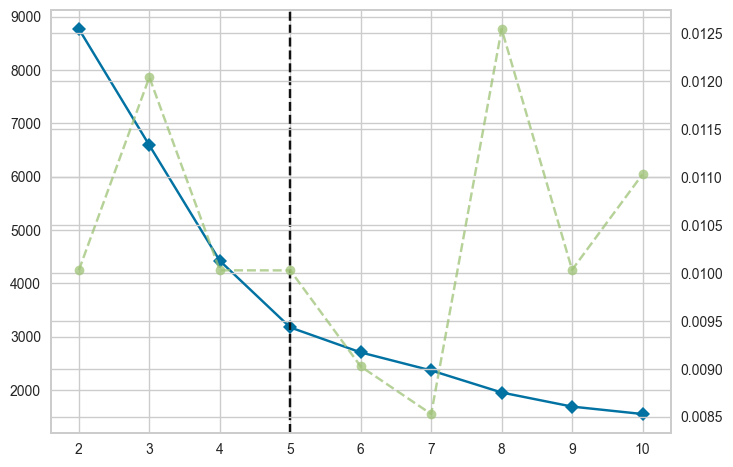

In [364]:
Elbow_M.fit(df_scaled)

## Silhouette Method

C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=10, n_init='auto',
                                      random_state=1509))

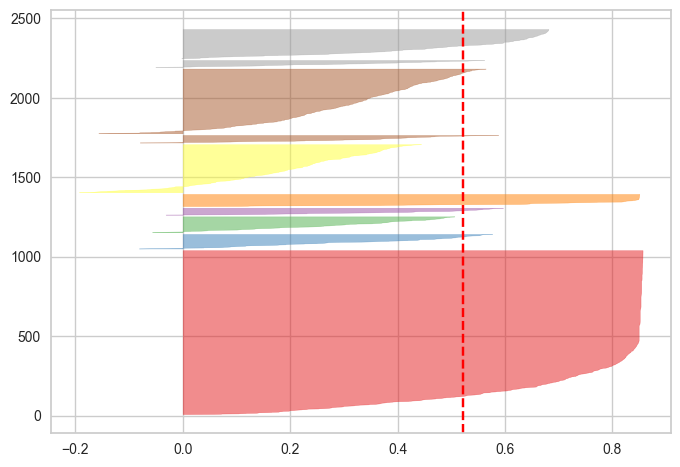

In [365]:
Silhouette_M.fit(df_scaled)

# vii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**



## The Elbow Method

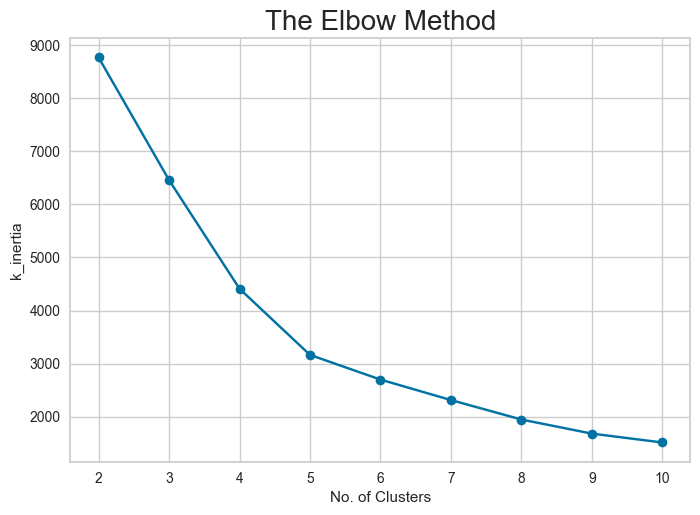

In [366]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(df_scaled)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Pada grafik diatas, setelah titik 5 penurunan inersianya tidak lagi signifikan, jadi nilai k = 5

In [367]:
km = KMeans(n_clusters = 5, random_state = 1509)
km.fit(df_scaled)

C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1509)

## Silhouette Score

In [368]:
#calculate the score
score = silhouette_score(df_scaled, km.labels_, metric='euclidean')
print('Score rata-rata silhouette ketika k = 5: %.3f' % score)

Score rata-rata silhouette ketika k = 5: 0.545


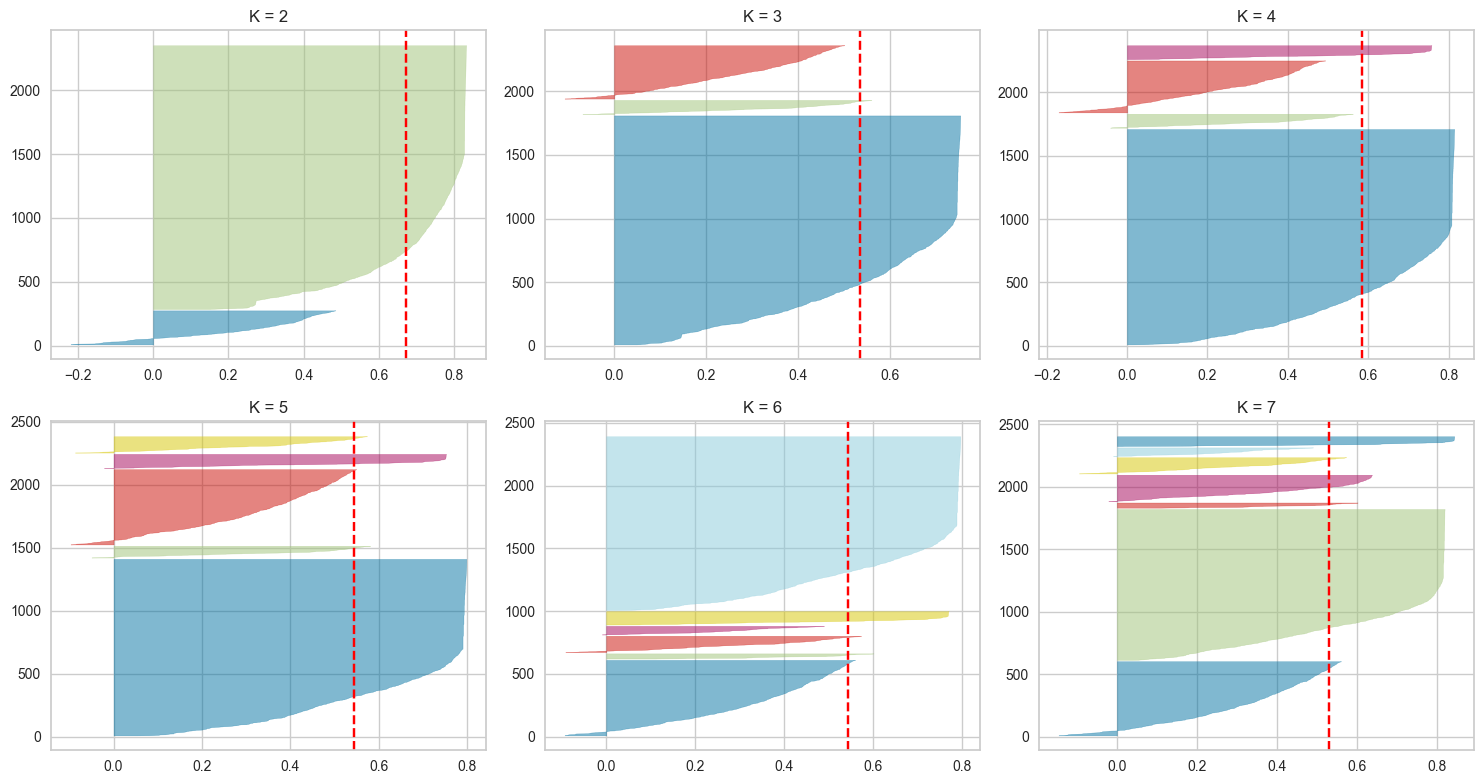

In [369]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 1509)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(df_scaled)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [370]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1509)
km.fit_predict(df_scaled)

array([1, 3, 0, ..., 0, 0, 0])

## Hasil

In [371]:
AC = AgglomerativeClustering(n_clusters=5)
Clusters = AC.fit_predict (df_scaled)

df_scaled['Clusters'] = Clusters

df_ori['Clusters'] = Clusters

C:\Users\farha\AppData\Local\Temp\ipykernel_33004\2216192754.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data = df_ori,x=df_ori["num_likes"], y=df_ori["num_shares"], hue=df_ori["Clusters"], palette=palette_color)


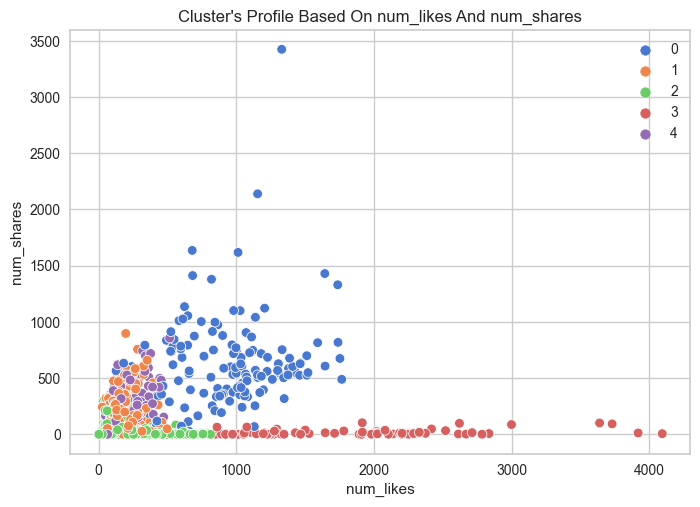

In [372]:
sns.scatterplot(data = df_ori,x=df_ori["num_likes"], y=df_ori["num_shares"], hue=df_ori["Clusters"], palette=palette_color)
plt.title("Cluster's Profile Based On num_likes And num_shares")
plt.legend()
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_33004\1398055777.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data = df_ori,x=df_ori["num_comments"], y=df_ori["num_reactions"], hue=df_ori["Clusters"], palette=palette_color)


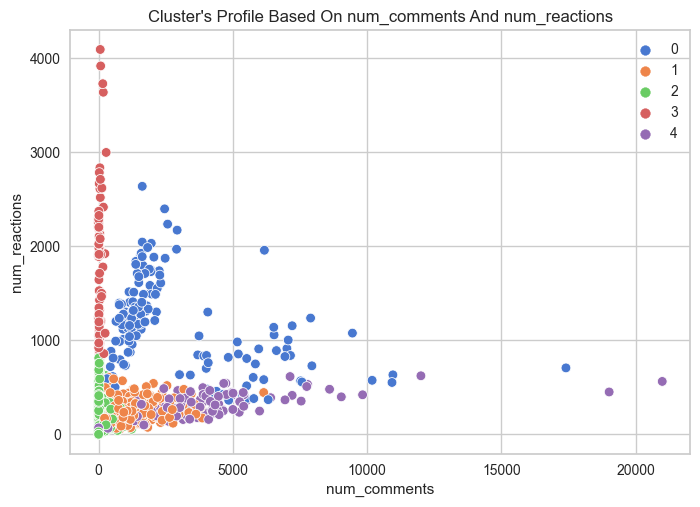

In [373]:
sns.scatterplot(data = df_ori,x=df_ori["num_comments"], y=df_ori["num_reactions"], hue=df_ori["Clusters"], palette=palette_color)
plt.title("Cluster's Profile Based On num_comments And num_reactions")
plt.legend()
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_33004\2216192754.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data = df_ori,x=df_ori["num_likes"], y=df_ori["num_shares"], hue=df_ori["Clusters"], palette=palette_color)


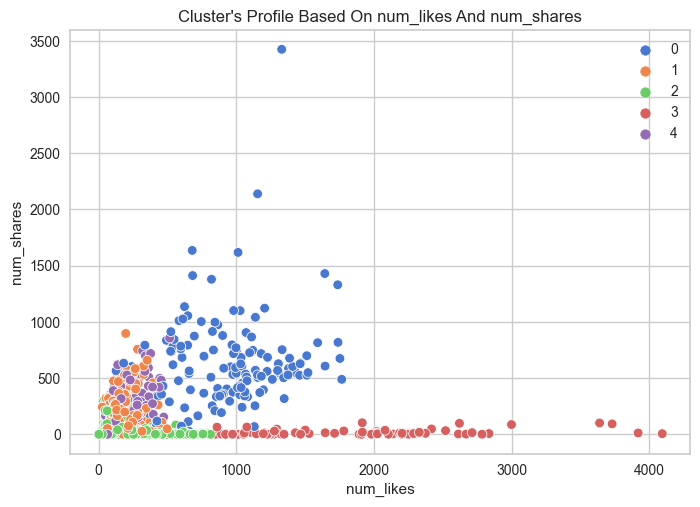

In [374]:
sns.scatterplot(data = df_ori,x=df_ori["num_likes"], y=df_ori["num_shares"], hue=df_ori["Clusters"], palette=palette_color)
plt.title("Cluster's Profile Based On num_likes And num_shares")
plt.legend()
plt.show()

# viii - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [375]:
# Save the Files

joblib.dump(km, "best_model.pkl")

['best_model.pkl']

# ix - Model Inference
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [376]:
load_model= joblib.load("best_model.pkl")

In [377]:
new_data = pd.DataFrame({
    'fullname': ['Depan Belakang'], 
    'first_name': ['Depan'], 
    'last_name': ['Belakang'], 
    'username': ['Delang'], 
    'gender': ['Male'],
    'num_reactions': [5], 
    'num_comments': [5], 
    'num_shares': [5], 
    'num_likes': [5], 
    'num_loves': [5],
    'num_wows': [5], 
    'num_hahas': [5], 
    'num_sads': [5], 
    'num_angrys': [5]
})
new_data

,fullname,first_name,last_name,username,gender,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,Depan Belakang,Depan,Belakang,Delang,Male,5,5,5,5,5,5,5,5,5


In [378]:
new_data_split = new_data.drop(['fullname', 'first_name', 'last_name', 'username', 'gender'], axis=1)

# x - Pengambilan Kesimpulan
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa:
    - Perbandingan antara Likes dan Shares, dan juga antara Reactions dan Comments tidak dipengaruhi oleh jenis kelamin, jadi siapa pun orangnya bisa memiliki angka yang besar atau kecil.